In [1]:
import pandas as pd
import os

In [2]:
folder = '../../results/'

figs = os.path.join(folder, 'figs')
file = os.path.join(folder, 'summarized-results.csv')

df = pd.read_csv(file)

category = 'FINA'

In [3]:
df_invo = df[df.Experiment == category]

0     1.011060
1     1.012603
2    -1.037631
3     1.003028
4     0.000000
18    0.000000
19   -1.079905
Name: New Factor, dtype: float64

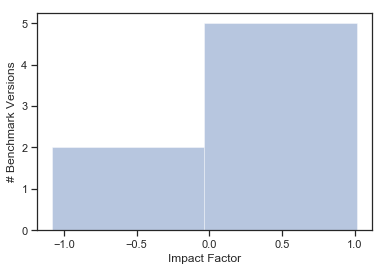

In [4]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
sns.set(font_scale=1)
sns.set_style("ticks")

ax = sns.distplot(df_invo['New Factor'], kde=False, hist=True)

ax.set(xlabel='Impact Factor', ylabel='# Benchmark Versions',)
df_invo['New Factor']

### Normalize Colors

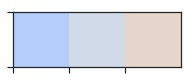

In [5]:
colors = sns.color_palette("coolwarm", 10)[3:6]  # No considerable effect 
sns.palplot(colors)

(-2, -1]    2
(-1, 1]     2
(1, 2]      3
Name: New Factor, dtype: int64


C:\Users\diego\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


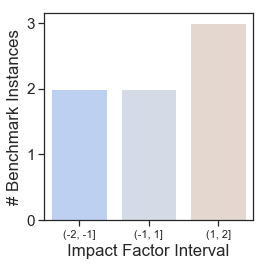

In [6]:
%matplotlib inline
sns.set(font_scale=1.4)
sns.set_style("ticks")
import math

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})


clrs = 'seismic'
clrs = 'coolwarm'
clrs = 'Reds'
clrs = 'coolwarm'


def plot_binning_distro(df, identifier):   
    min_val = math.floor(df['New Factor'].min()) 
    max_val = int(df['New Factor'].max()) + 1  # 

    
    bins=[-2,-1,1,2]
    
    binned_df = pd.cut(df['New Factor'], bins=bins).value_counts()
    # Sort first
    binned_df = binned_df.sort_index()
    
    print(binned_df)
    plt.figure(figsize=(len(bins) * 1 ,4)) 
    plt.xticks(fontsize=11)
    
    ax = sns.barplot(x=binned_df.index, y=binned_df, palette=colors)
    ax.set(xlabel='Impact Factor Interval', ylabel='# Benchmark Instances')

    new_intervals = binned_df.index
    ax.xaxis.set_major_formatter(ticker.FixedFormatter(new_intervals))

    figname = 'distribution-impact-%s.pdf' % identifier

    plt.savefig(os.path.join(figs, figname))
    #plt.clf()

plot_binning_distro(df_invo, category)

### Violinplot

### Generate Table

In [31]:

def analyze_bench_test(test):
    impacted = len(test[test['New Factor'].abs() > 1.00])
    total = len(test)

    return pd.Series({'Impacted': impacted, 'Total':total})
    
def analyze_project(proj):
    
    result = proj.groupby(by=['Class','Method']).apply(analyze_bench_test)
    
    versions_impacted = result['Impacted'].sum()
    total_versions = result['Total'].sum()
    
    bench_impacted = len(result[result['Impacted'] > 0])
    total_bench = len(result)
    
    return pd.Series({'Bench Impacted': bench_impacted, 'Total Bench': total_bench, 
                      '% Bench': bench_impacted / total_bench * 100,
        'Versions Impacted': versions_impacted, 'Total Versions': total_versions,
                     '% Version': versions_impacted / total_versions * 100})





table = df_invo.groupby(by='Project').apply(analyze_project)


table = table[['Bench Impacted', 'Total Bench', '% Bench', 'Versions Impacted', 'Total Versions','% Version']]
table.loc['Total'] = table.sum()

print(table.to_latex())


\begin{tabular}{lrrrrrr}
\toprule
{} &  Bench Impacted &  Total Bench &  \% Bench &  Versions Impacted &  Total Versions &  \% Version \\
Project &                 &              &          &                    &                 &            \\
\midrule
log4j2  &             4.0 &          5.0 &     80.0 &                4.0 &             5.0 &       80.0 \\
netty   &             1.0 &          2.0 &     50.0 &                1.0 &             2.0 &       50.0 \\
Total   &             5.0 &          7.0 &    130.0 &                5.0 &             7.0 &      130.0 \\
\bottomrule
\end{tabular}



In [17]:
table.sum(numeric_only=True)

Bench Impacted         2.0
Total Bench            4.0
% Bench              100.0
Versions Impacted      2.0
Total Versions         4.0
% Version            100.0
dtype: float64

### Correlation with benchmark execution time